In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/drive/MyDrive/Underwater garbage Detection.v1i.yolov8.zip'

# Destination folder to extract files
extract_to = '/content/drive/MyDrive/Underwater garbage Detection'  # Change as needed

# Create the folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to: {extract_to}")

Dataset extracted to: /content/drive/MyDrive/Underwater garbage Detection


In [ ]:
import os

# Path to labels and class names
labels_dir = '/content/drive/MyDrive/Underwater garbage Detection/test/labels'
class_file = '/content/drive/MyDrive/Underwater garbage Detection/test/labels/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.e725c6065194dd5aeda76ae3a30e0ce7.txt'  # Update this if your file has a different name

# Load class names
with open(class_file, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

# Process each label file
for label_filename in os.listdir(labels_dir):
    if not label_filename.endswith('.txt'):
        continue

    print(f"\n--- {label_filename} ---")
    with open(os.path.join(labels_dir, label_filename), 'r') as f:
        lines = f.readlines()

    if not lines:
        print("(Empty file)")
        continue

    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        bbox = list(map(float, parts[1:]))  # x_center, y_center, width, height
        class_name = class_names[class_id] if class_id < len(class_names) else f"Unknown({class_id})"
        print(f"{class_name}: [x={bbox[0]}, y={bbox[1]}, w={bbox[2]}, h={bbox[3]}]")



--- 1bc7-iudfmpmn7245599_jpg.rf.616a393590ae0656d4754997ab8d5f0c.txt ---
Unknown(5): [x=0.7171875, y=0.62890625, w=0.51953125, h=0.36796875]

--- 200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.e725c6065194dd5aeda76ae3a30e0ce7.txt ---
Unknown(5): [x=0.1875, y=0.6265625, w=0.290625, h=0.43046875]
Unknown(5): [x=0.74296875, y=0.6453125, w=0.115625, h=0.31015625]
5 0.1875 0.6265625 0.290625 0.43046875: [x=0.5015625, y=0.665625, w=0.33671875, h=0.490625]

--- 66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.bac125986e2fe81c0979d95ade0b1009.txt ---
5 0.1875 0.6265625 0.290625 0.43046875: [x=0.30546875, y=0.21640625, w=0.228125, h=0.1421875]
5 0.1875 0.6265625 0.290625 0.43046875: [x=0.73828125, y=0.1296875, w=0.16796875, h=0.2546875]

--- 7_JPG_jpg.rf.bd94347975ead23d690fb491f8e1a7a5.txt ---
5 0.1875 0.6265625 0.290625 0.43046875: [x=0.4390625, y=0.3796875, w=0.4375, h=0.31015625]

--- GettyImages-1227891345-1000x667_jpg.rf.8213b15df52d20cb64455bc41dc9548d.txt ---
5 0.1875 0.626562

In [ ]:
yaml_content = """
train: /content/drive/MyDrive/Underwater garbage Detection/train/images
val: /content/drive/MyDrive/Underwater garbage Detection/valid/images
test: /content/drive/MyDrive/Underwater garbage Detection/test/images

nc: 15
names: ['Mask', 'can', 'cellphone', 'electronics', 'gbottle', 'glove', 'metal', 'misc', 'net', 'pbag', 'pbottle', 'plastic', 'rod', 'sunglasses', 'tire']
"""

with open('data.yaml', 'w') as f:
    f.write(yaml_content.strip())

print("Overwritten: data.yaml")

Overwritten: data.yaml


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from ultralytics import YOLO

# Load your custom or pre-trained model (e.g., YOLOv8s)
model = YOLO('yolov8m.pt')  # or 'yolov8n.pt', 'yolov8m.pt', or your custom model

# Train the model
model.train(
    data='/content/drive/MyDrive/Underwater garbage Detection/data.yaml',         # Path to your YAML file
    epochs=50,                # Total number of epochs
    imgsz=640,                # Image size
    save=True,                # Save model
    save_period=5,            # ✅ Save every 5th epoch (5, 10, 15, ...)
    name='yolov8_trash',      # Custom run name (folder under runs/detect/)
    project='runs/detect',    # Where to save training logs/checkpoints
    workers=4,                # Number of dataloader workers
    batch=16                  # Adjust based on GPU RAM
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 249MB/s]


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Underwater garbage Detection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=4, project=runs/detect, name=yolov8_trash, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.4MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Underwater garbage Detection/train/labels... 3626 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3626/3626 [19:50<00:00,  3.05it/s]


train: New cache created: /content/drive/MyDrive/Underwater garbage Detection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Underwater garbage Detection/valid/labels... 968 images, 0 backgrounds, 0 corrupt: 100%|██████████| 968/968 [05:35<00:00,  2.89it/s]


val: New cache created: /content/drive/MyDrive/Underwater garbage Detection/valid/labels.cache
Plotting labels to runs/detect/yolov8_trash/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_trash
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.39G      1.454      2.542      1.695         46        640: 100%|██████████| 227/227 [02:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:16<00:00,  1.85it/s]


                   all        968       1851       0.69      0.177      0.223      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       7.6G      1.504      2.111      1.719         53        640: 100%|██████████| 227/227 [02:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.04it/s]


                   all        968       1851      0.626       0.23      0.197      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.67G      1.533      2.087      1.745         69        640: 100%|██████████| 227/227 [02:00<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.01it/s]


                   all        968       1851      0.667      0.227      0.234      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.74G      1.521      2.085      1.727         48        640: 100%|██████████| 227/227 [02:00<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  1.96it/s]


                   all        968       1851      0.422       0.21      0.195      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       7.8G      1.475      1.933      1.695         40        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.04it/s]


                   all        968       1851      0.677      0.266      0.277      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.87G      1.443      1.854      1.681         51        640: 100%|██████████| 227/227 [02:00<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  1.99it/s]


                   all        968       1851      0.549      0.338      0.361      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.94G      1.414      1.737      1.648         80        640: 100%|██████████| 227/227 [02:00<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  1.96it/s]


                   all        968       1851      0.604      0.313      0.338      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         8G      1.371      1.649      1.623         37        640: 100%|██████████| 227/227 [02:00<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.03it/s]


                   all        968       1851        0.6      0.351       0.37      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.07G      1.359      1.575      1.603         42        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.05it/s]


                   all        968       1851      0.719      0.352      0.399      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.62G      1.326      1.532      1.585         91        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  1.98it/s]

                   all        968       1851      0.683      0.318      0.351      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.69G      1.306      1.479      1.582         28        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  1.99it/s]


                   all        968       1851      0.657      0.349      0.397       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.76G      1.299      1.467      1.567         37        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.00it/s]


                   all        968       1851      0.666      0.382       0.43      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.82G      1.274      1.391      1.546         50        640: 100%|██████████| 227/227 [02:00<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.02it/s]


                   all        968       1851      0.671      0.386      0.439      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.89G      1.252      1.341      1.531         42        640: 100%|██████████| 227/227 [01:59<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  1.96it/s]

                   all        968       1851      0.701      0.406      0.475      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.96G      1.247      1.305      1.515         39        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  1.97it/s]


                   all        968       1851      0.617      0.438      0.468       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.02G      1.235      1.271      1.505         37        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  1.99it/s]


                   all        968       1851      0.667      0.462      0.513      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.09G      1.218      1.238      1.497         56        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.02it/s]

                   all        968       1851      0.787      0.389      0.465      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.15G      1.187      1.182      1.467         48        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.06it/s]


                   all        968       1851      0.626      0.455      0.515      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.71G      1.187       1.18      1.473         27        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.03it/s]


                   all        968       1851      0.715      0.486       0.54      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.77G      1.183      1.147      1.474         44        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.04it/s]


                   all        968       1851      0.601      0.453      0.511       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.84G      1.163      1.106      1.458         36        640: 100%|██████████| 227/227 [01:59<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.03it/s]


                   all        968       1851      0.623      0.525      0.593      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.91G      1.164      1.104      1.458         45        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.05it/s]


                   all        968       1851      0.545       0.56      0.574      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.98G      1.147      1.078      1.441         51        640: 100%|██████████| 227/227 [02:00<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.04it/s]


                   all        968       1851      0.627      0.541      0.599      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        10G      1.145      1.047      1.429         17        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.04it/s]


                   all        968       1851       0.73      0.533      0.584      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.1G      1.113      1.016      1.418         48        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.05it/s]


                   all        968       1851      0.764      0.511       0.61      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.7G      1.112     0.9821      1.409         32        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.05it/s]


                   all        968       1851      0.703      0.604      0.643      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.7G      1.103     0.9805      1.406         58        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.03it/s]

                   all        968       1851      0.609      0.664      0.672      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.8G      1.082     0.9496       1.39         54        640: 100%|██████████| 227/227 [02:00<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.01it/s]

                   all        968       1851      0.582      0.616      0.641      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.9G      1.092     0.9421       1.39         72        640: 100%|██████████| 227/227 [01:59<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.05it/s]

                   all        968       1851      0.678      0.637      0.686      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.9G      1.073     0.9134      1.384         31        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.06it/s]

                   all        968       1851      0.721      0.631      0.697      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.5G      1.051     0.8891      1.371         32        640: 100%|██████████| 227/227 [02:00<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.04it/s]

                   all        968       1851      0.718        0.6      0.659      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.6G      1.053     0.8808      1.373         21        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.04it/s]

                   all        968       1851      0.618      0.702      0.689      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.6G      1.042     0.8522      1.356         43        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.00it/s]

                   all        968       1851      0.687      0.664      0.706       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.7G      1.033     0.8363      1.352         41        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.02it/s]

                   all        968       1851      0.689      0.654      0.685      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.8G      1.017     0.8198      1.341         34        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.06it/s]

                   all        968       1851      0.741      0.631      0.699      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.8G      1.014     0.8088      1.338         37        640: 100%|██████████| 227/227 [01:59<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.00it/s]

                   all        968       1851      0.719      0.675       0.72      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.9G     0.9923      0.785      1.321         23        640: 100%|██████████| 227/227 [01:59<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:14<00:00,  2.07it/s]


                   all        968       1851       0.77      0.636      0.713      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        12G     0.9848     0.7772      1.318         44        640: 100%|██████████| 227/227 [01:59<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.05it/s]


                   all        968       1851      0.734       0.66      0.734       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        12G     0.9714     0.7571      1.303         43        640: 100%|██████████| 227/227 [01:59<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  1.99it/s]


                   all        968       1851       0.79      0.671      0.754      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.1G     0.9605     0.7439      1.301         42        640: 100%|██████████| 227/227 [02:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.02it/s]


                   all        968       1851      0.858      0.639      0.764      0.493
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.2G     0.9008     0.5923       1.28         14        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.02it/s]


                   all        968       1851      0.776      0.701      0.792      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.7G     0.8759     0.5518       1.27         18        640: 100%|██████████| 227/227 [01:59<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  1.99it/s]

                   all        968       1851      0.764      0.737      0.779      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.8G     0.8699     0.5288       1.26         22        640: 100%|██████████| 227/227 [01:59<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.02it/s]

                   all        968       1851      0.764      0.746      0.797      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.8G      0.844     0.5153      1.243         25        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.05it/s]

                   all        968       1851      0.854      0.701      0.794      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.9G     0.8333     0.5048       1.24         25        640: 100%|██████████| 227/227 [01:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.06it/s]

                   all        968       1851      0.801      0.722      0.794      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        13G     0.8187     0.4853      1.219         23        640: 100%|██████████| 227/227 [01:59<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.04it/s]

                   all        968       1851      0.818      0.693      0.793      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.07G     0.8144     0.4717      1.214         27        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.03it/s]

                   all        968       1851      0.828      0.741      0.808      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.07G     0.7964     0.4644      1.205         16        640: 100%|██████████| 227/227 [01:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.01it/s]

                   all        968       1851      0.753       0.74      0.788       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.07G      0.794     0.4571      1.209         14        640: 100%|██████████| 227/227 [01:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.04it/s]

                   all        968       1851      0.771      0.737      0.794       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.07G     0.7853     0.4519      1.196         16        640: 100%|██████████| 227/227 [01:59<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.03it/s]


                   all        968       1851      0.779      0.735      0.803      0.523

50 epochs completed in 1.919 hours.
Optimizer stripped from runs/detect/yolov8_trash/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8_trash/weights/best.pt, 52.0MB

Validating runs/detect/yolov8_trash/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:17<00:00,  1.74it/s]


                   all        968       1851      0.821      0.739      0.807      0.524
                  Mask         45         50          1      0.796      0.964      0.714
                   can         18         20      0.879        0.7      0.797      0.348
             cellphone         61         71      0.923      0.972      0.987      0.876
           electronics         27         40      0.873      0.725      0.786      0.485
               gbottle         36         82       0.74      0.744        0.8      0.579
                 glove         37         55      0.911      0.818      0.868      0.725
                 metal         10         22      0.429      0.364      0.376      0.252
                  misc         48         51      0.826      0.653      0.812      0.465
                   net        146        148      0.887      0.851      0.932      0.668
                  pbag        290        330      0.887      0.979      0.974      0.854
               pbottl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e75d7fc5a10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   


image 1/1 /content/drive/MyDrive/Underwater garbage Detection/test/images/gloves_in_the_ocean25_jpg.rf.817ac7ef04a5ab7ab54474d027dab085.jpg: 640x640 2 gloves, 36.4ms
Speed: 2.5ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


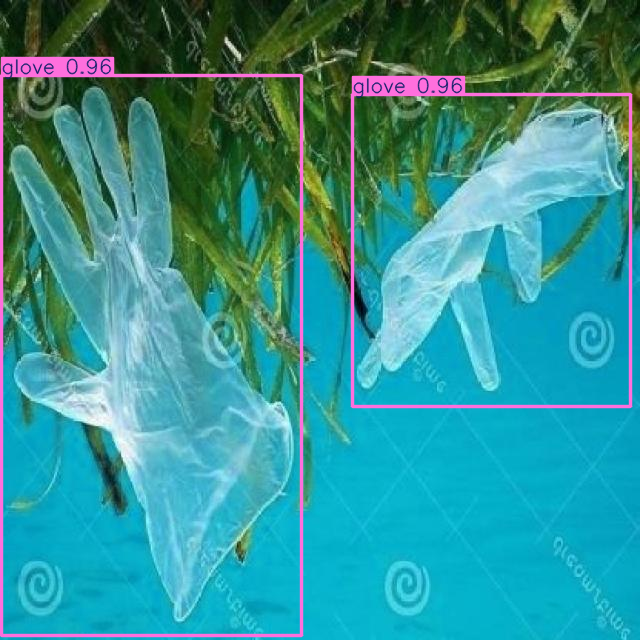

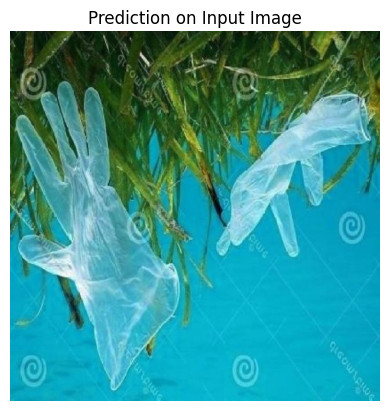

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO('/content/runs/detect/yolov8_trash/weights/best.pt')  # or best.pt

# Path to the image you want to test
image_path = '/content/drive/MyDrive/Underwater garbage Detection/test/images/gloves_in_the_ocean25_jpg.rf.817ac7ef04a5ab7ab54474d027dab085.jpg'  # Change this to your image path

# Run inference (prediction)
results = model(image_path, save=True, conf=0.25)  # conf = confidence threshold

# Optionally show image with results
results[0].show()  # Display with bounding boxes

# OR to view with matplotlib (if .show doesn't work in your environment)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Prediction on Input Image")
plt.show()



image 1/1 /content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_yt-84__fliph_jpg.rf.d541e6072664453383ea7c9754878502.jpg: 640x640 2 pbottles, 36.3ms
Speed: 2.1ms preprocess, 36.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


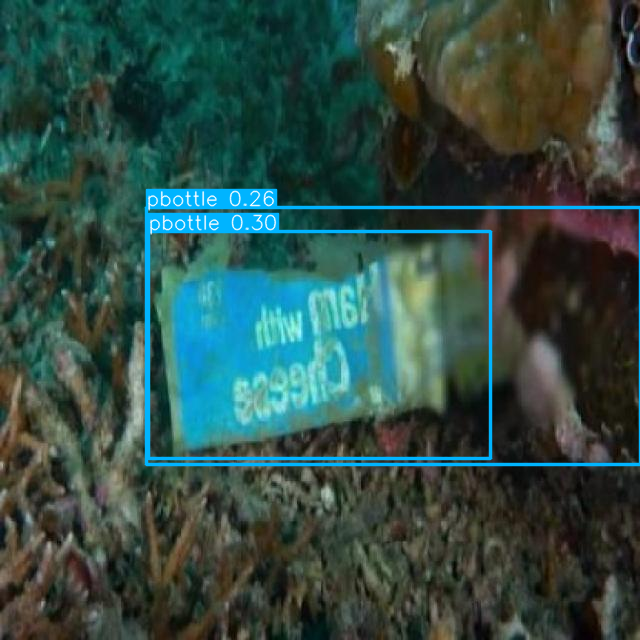

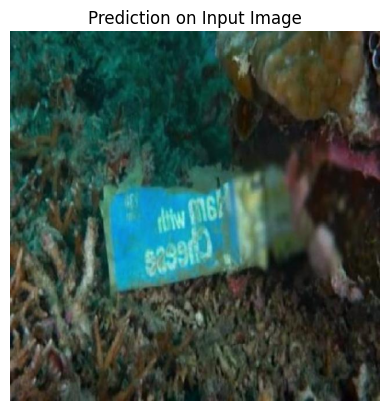

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO('/content/runs/detect/yolov8_trash/weights/best.pt')  # or best.pt

# Path to the image you want to test
image_path = '/content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_yt-84__fliph_jpg.rf.d541e6072664453383ea7c9754878502.jpg'
# Run inference (prediction)
results = model(image_path, save=True, conf=0.25)  # conf = confidence threshold

# Optionally show image with results
results[0].show()  # Display with bounding boxes

# OR to view with matplotlib (if .show doesn't work in your environment)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Prediction on Input Image")
plt.show()



image 1/1 /content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_yt-91__fliph_jpg.rf.241766ee34ec9cd460cd98b3e25600c7.jpg: 640x640 1 net, 36.4ms
Speed: 2.1ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


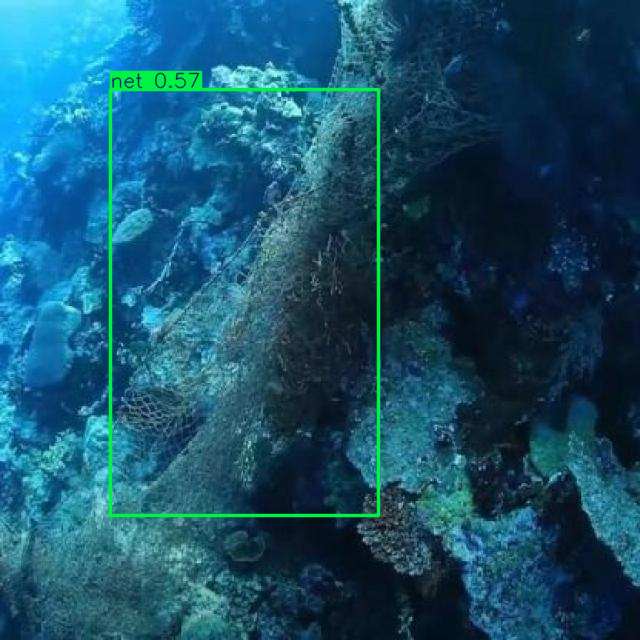

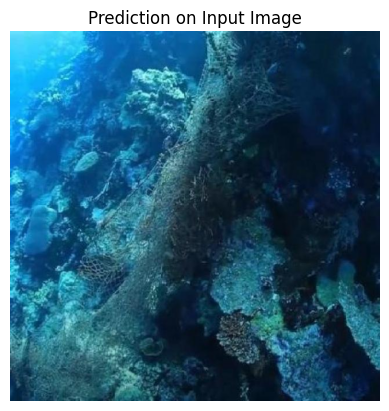

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO('/content/runs/detect/yolov8_trash/weights/best.pt')  # or best.pt

# Path to the image you want to test
image_path = '/content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_yt-91__fliph_jpg.rf.241766ee34ec9cd460cd98b3e25600c7.jpg'
# Run inference (prediction)
results = model(image_path, save=True, conf=0.25)  # conf = confidence threshold

# Optionally show image with results
results[0].show()  # Display with bounding boxes

# OR to view with matplotlib (if .show doesn't work in your environment)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Prediction on Input Image")
plt.show()



image 1/1 /content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_g-740__flipv_jpg.rf.e72a14cf3f687e04c2473978e08badbe.jpg: 640x640 1 pbag, 37.2ms
Speed: 2.1ms preprocess, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6


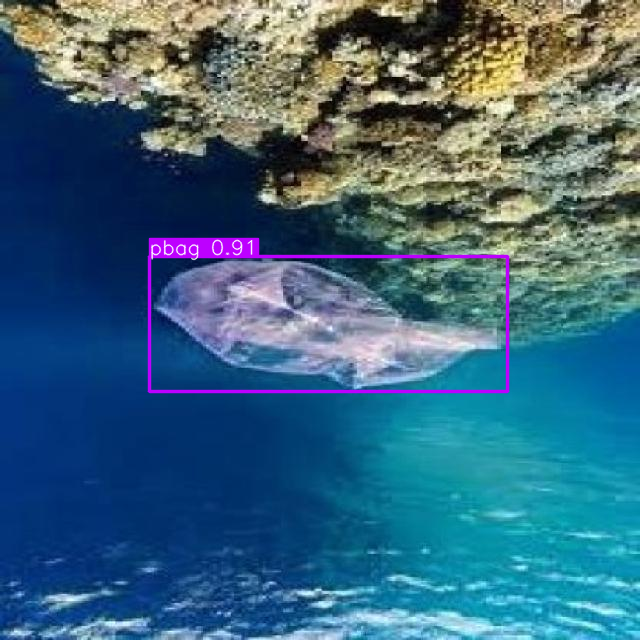

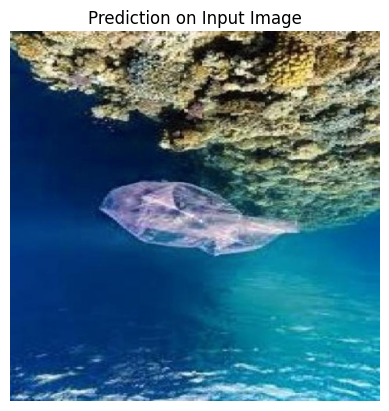

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO('/content/runs/detect/yolov8_trash/weights/best.pt')  # or best.pt

# Path to the image you want to test
image_path = '/content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_g-740__flipv_jpg.rf.e72a14cf3f687e04c2473978e08badbe.jpg'
# Run inference (prediction)
results = model(image_path, save=True, conf=0.25)  # conf = confidence threshold

# Optionally show image with results
results[0].show()  # Display with bounding boxes

# OR to view with matplotlib (if .show doesn't work in your environment)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Prediction on Input Image")
plt.show()



image 1/1 /content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_g-533_jpeg_jpg.rf.9e59ea01e27798176d9f2e5f31da67d8.jpg: 640x640 1 pbag, 37.2ms
Speed: 2.8ms preprocess, 37.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7


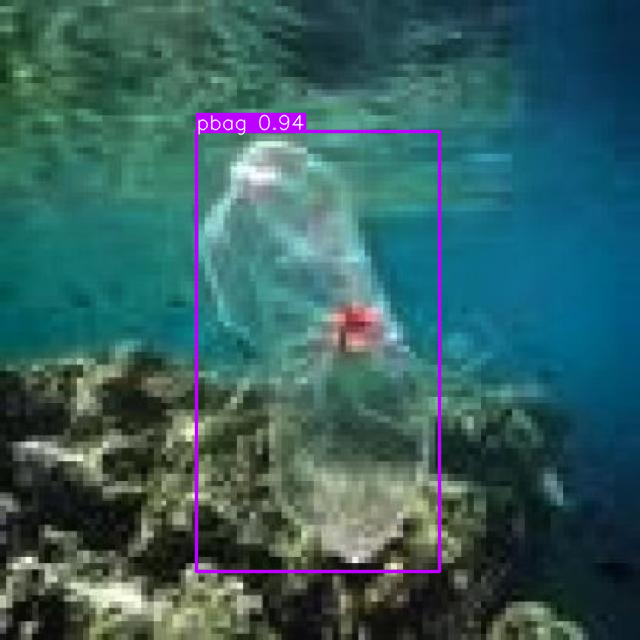

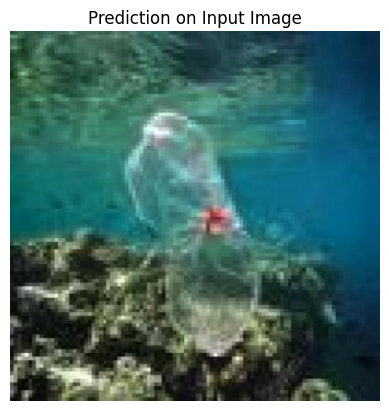

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO('/content/runs/detect/yolov8_trash/weights/best.pt')  # or best.pt

# Path to the image you want to test
image_path = '/content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_g-533_jpeg_jpg.rf.9e59ea01e27798176d9f2e5f31da67d8.jpg'
# Run inference (prediction)
results = model(image_path, save=True, conf=0.25)  # conf = confidence threshold

# Optionally show image with results
results[0].show()  # Display with bounding boxes

# OR to view with matplotlib (if .show doesn't work in your environment)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Prediction on Input Image")
plt.show()



image 1/1 /content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_g-805-1-__flipv_jpg.rf.d432a7bf2eb7712cd907785c718b8d73.jpg: 640x640 1 pbag, 37.1ms
Speed: 2.1ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


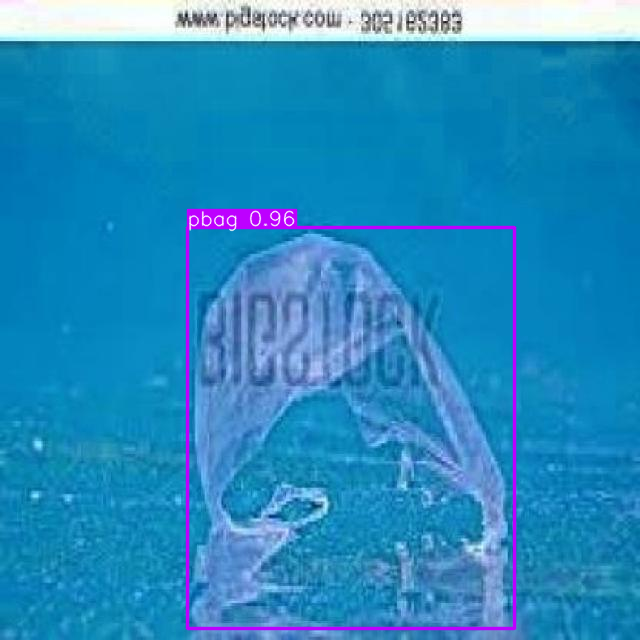

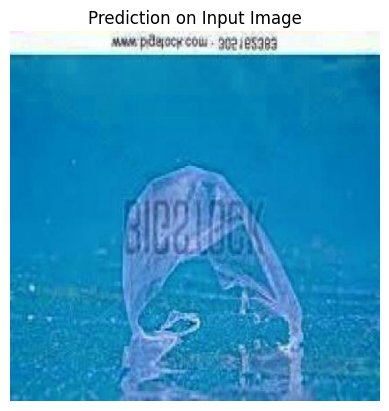

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO('/content/runs/detect/yolov8_trash/weights/best.pt')  # or best.pt

# Path to the image you want to test
image_path = '/content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_g-805-1-__flipv_jpg.rf.d432a7bf2eb7712cd907785c718b8d73.jpg'
# Run inference (prediction)
results = model(image_path, save=True, conf=0.25)  # conf = confidence threshold

# Optionally show image with results
results[0].show()  # Display with bounding boxes

# OR to view with matplotlib (if .show doesn't work in your environment)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Prediction on Input Image")
plt.show()



image 1/1 /content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_g-281__flipv_jpg.rf.a93dee5168c29521d9483203babdd30a.jpg: 640x640 1 gbottle, 37.2ms
Speed: 2.8ms preprocess, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8


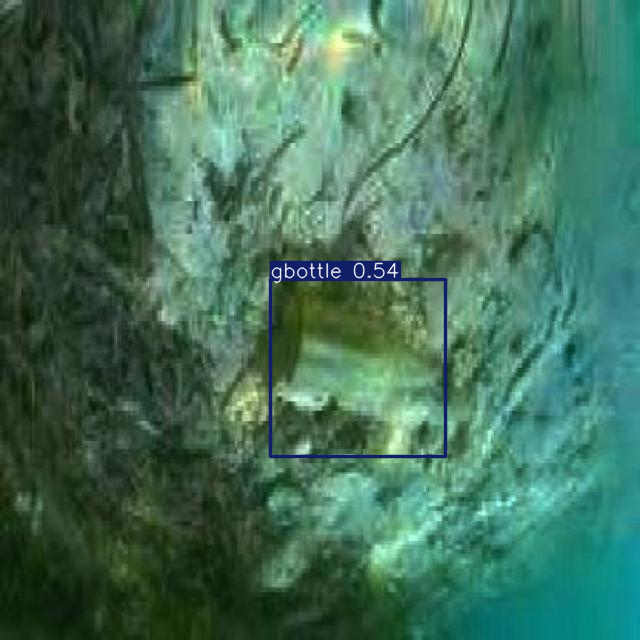

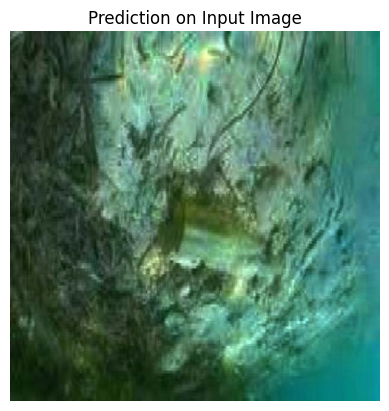

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO('/content/runs/detect/yolov8_trash/weights/best.pt')  # or best.pt

# Path to the image you want to test
image_path = '/content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_g-281__flipv_jpg.rf.a93dee5168c29521d9483203babdd30a.jpg'
# Run inference (prediction)
results = model(image_path, save=True, conf=0.25)  # conf = confidence threshold

# Optionally show image with results
results[0].show()  # Display with bounding boxes

# OR to view with matplotlib (if .show doesn't work in your environment)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Prediction on Input Image")
plt.show()


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import os

# List files in the directory where your model should be saved
model_dir = '/content/drive/MyDrive/Underwater garbage Detection/'
print(os.listdir(model_dir))


['README.dataset.txt', 'README.roboflow.txt', 'data.yaml', 'test', 'train', 'valid', 'best (4).pt']


In [ ]:
from ultralytics import YOLO

# Load the model from the checkpoint you saved earlier
model = YOLO('/content/drive/MyDrive/best (4).pt')  # Update this path


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Underwater garbage Detection/best (4).pt')  # Load existing weights

model.train(
    data='/content/drive/MyDrive/Underwater garbage Detection/data.yaml',
    epochs=52,  # Start a new training cycle
    project='/content/drive/MyDrive/yolov8_trash',  # Saves everything to this Drive folder
    name='exp1',  # Folder inside yolov8_trash
    save=True,
    save_period=5,
    plots=True
    resume = True# Ensures all plots like confusion matrix etc. are saved
)


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Underwater garbage Detection/best (4).pt, data=/content/drive/MyDrive/Underwater garbage Detection/data.yaml, epochs=52, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8_trash, name=exp14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

100%|██████████| 755k/755k [00:00<00:00, 23.9MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Underwater garbage Detection/train/labels.cache... 3626 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3626/3626 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Underwater garbage Detection/valid/labels.cache... 968 images, 0 backgrounds, 0 corrupt: 100%|██████████| 968/968 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolov8_trash/exp14/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolov8_trash/exp14
Starting training for 52 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/52      6.36G     0.9284      0.717      1.289         77        640:  51%|█████     | 115/227 [01:04<01:02,  1.78it/s]


KeyboardInterrupt: 

In [ ]:
import os

base_path = "/content/drive/MyDrive/yolov8_trash"
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        print(f"\n📁 Folder: {folder}")
        files = os.listdir(folder_path)
        for f in files:
            print("   └──", f)



📁 Folder: exp1
   └── weights
   └── args.yaml
   └── events.out.tfevents.1744625255.9b78c57eaa5a.484.1
   └── labels_correlogram.jpg
   └── labels.jpg

📁 Folder: exp12
   └── weights
   └── args.yaml
   └── labels_correlogram.jpg
   └── labels.jpg
   └── events.out.tfevents.1744625458.9b78c57eaa5a.3033.0

📁 Folder: exp13
   └── weights
   └── args.yaml
   └── labels_correlogram.jpg
   └── labels.jpg
   └── events.out.tfevents.1744625885.9b78c57eaa5a.3892.0

📁 Folder: exp14
   └── weights
   └── args.yaml
   └── events.out.tfevents.1744640981.46b7b25e6e5a.674.0
   └── labels_correlogram.jpg
   └── labels.jpg
   └── train_batch0.jpg
   └── train_batch1.jpg
   └── train_batch2.jpg

📁 Folder: exp15
   └── weights
   └── args.yaml
   └── events.out.tfevents.1744641627.46b7b25e6e5a.8303.0
   └── labels_correlogram.jpg
   └── labels.jpg
   └── train_batch0.jpg
   └── train_batch1.jpg
   └── train_batch2.jpg


In [ ]:
import os

for folder in os.listdir(base_path):
    weights_path = os.path.join(base_path, folder, "weights", "best.pt")
    if os.path.exists(weights_path):
        size_mb = os.path.getsize(weights_path) / (1024 * 1024)
        print(f"{folder}/weights/best.pt - {size_mb:.2f} MB")


In [ ]:
!yolo detect train \
  model="/content/drive/MyDrive/last.pt" \
  data="/content/drive/MyDrive/Underwater garbage Detection/data.yaml" \
  epochs=2 \
  project="/content/drive/MyDrive/yolov8_trash" \
  name="exp50"


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/last.pt, data=/content/drive/MyDrive/Underwater garbage Detection/data.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8_trash, name=exp503, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=


image 1/1 /content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_g-281__flipv_jpg.rf.a93dee5168c29521d9483203babdd30a.jpg: 640x640 1 pbottle, 37.2ms
Speed: 2.1ms preprocess, 37.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


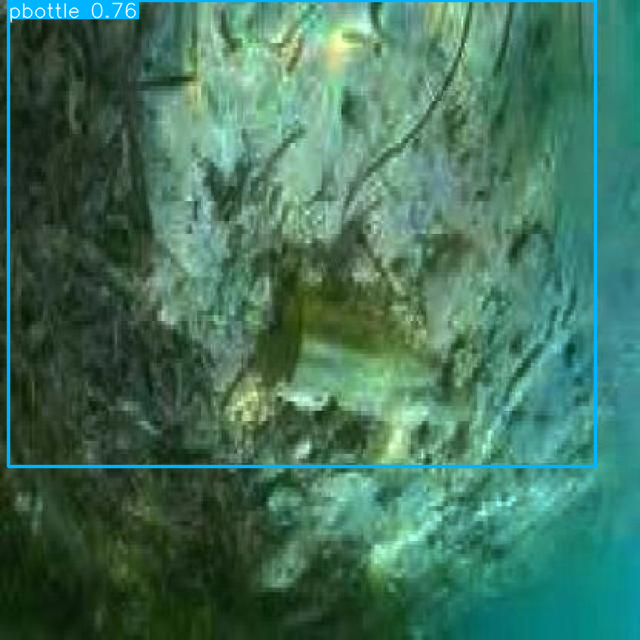

In [ ]:
from ultralytics import YOLO

# Load model
model = YOLO("/content/drive/MyDrive/yolov8_trash/exp503/weights/best.pt")

# Run inference on an image
results = model('/content/drive/MyDrive/Underwater garbage Detection/test/images/uwg_g-281__flipv_jpg.rf.a93dee5168c29521d9483203babdd30a.jpg'
)

# Show results
results[0].show()


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/yolov8_trash/exp503/weights/best.pt')

# Run validation to get confusion matrix, PR curve, F1 curve, etc.
results = model.val(
    data="/content/drive/MyDrive/Underwater garbage Detection/data.yaml",  # path to your dataset YAML
    save=True,    # saves plots like confusion matrix, PR curve, etc.
    save_txt=False,
    save_conf=True,
    plots=True,   # enables all plots
    verbose=True
)


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/Underwater garbage Detection/valid/labels.cache... 968 images, 0 backgrounds, 0 corrupt: 100%|██████████| 968/968 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]


                   all        968       1851      0.733      0.762      0.782      0.488
                  Mask         45         50      0.918        0.9      0.949      0.738
                   can         18         20      0.552        0.7      0.749      0.315
             cellphone         61         71      0.959      0.972      0.982      0.866
           electronics         27         40      0.791      0.725      0.766       0.45
               gbottle         36         82       0.72      0.768      0.784      0.578
                 glove         37         55      0.954      0.759      0.862      0.698
                 metal         10         22      0.435      0.595      0.487      0.224
                  misc         48         51      0.651      0.667      0.698      0.382
                   net        146        148      0.784      0.851      0.906      0.631
                  pbag        290        330      0.848      0.962       0.95       0.82
               pbottl

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/drive/MyDrive/yolov8_trash/exp503/weights/best.pt")  # or provide the path to your model

# Evaluate the model on the validation set
metrics = model.val()  # this returns a rich object of metrics

# Access mAP@0.5 and convert it to percentage
map_50 = metrics.box.map50  # mAP@0.5
map_50_95 = metrics.box.map  # mAP@[0.5:0.95]

print(f"mAP@0.5: {map_50 * 100:.2f}%")
print(f"mAP@0.5:0.95: {map_50_95 * 100:.2f}%")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 92 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 20.6MB/s]
val: Scanning /content/drive/MyDrive/Underwater garbage Detection/valid/labels.cache... 968 images, 0 backgrounds, 0 corrupt: 100%|██████████| 968/968 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [34:13<00:00, 33.66s/it]


                   all        968       1851      0.733      0.762      0.782      0.488
                  Mask         45         50      0.918        0.9      0.949      0.738
                   can         18         20      0.552        0.7      0.749      0.315
             cellphone         61         71      0.959      0.972      0.982      0.866
           electronics         27         40      0.791      0.725      0.766       0.45
               gbottle         36         82       0.72      0.768      0.784      0.578
                 glove         37         55      0.954      0.759      0.862      0.698
                 metal         10         22      0.435      0.595      0.487      0.224
                  misc         48         51      0.651      0.667      0.698      0.382
                   net        146        148      0.784      0.851      0.906      0.631
                  pbag        290        330      0.848      0.962       0.95       0.82
               pbottl